In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:

with open("Exp_01_Densidade_Grupo_Rodolfo_Cordeiro_João_Pedro_Ana_Julia_Jonathaz_Izac.csv", 'r', encoding='utf-8') as file:
    lines = file.readlines()


lines[:30]

['Grandeza; Valor; Resolução; Descrição\n',
 'V   ;150;5;" ""Volume de água no béquer cuja resolução é 5 ml"""\n',
 'Ma  ;144;1;" ""Massa da água no béquer, medida pela balança"""\n',
 'Mt  ;300;1;" ""Massa total dos discos"""\n',
 'Vt  ;35;5;" ""Volume total de água deslocada ao inserir os discos"""\n',
 'm1  ;50;1;" ""Massa do disco 1 utilizando uma balança digital cuja resolução é 1 g"""\n',
 'm2  ;50;1;" ""Massa do disco 2 utilizando uma balança digital cuja resolução é 1 g"""\n',
 'm3  ;50;1;" ""Massa do disco 3 utilizando uma balança digital cuja resolução é 1 g"""\n',
 'm4  ;50;1;" ""Massa do disco 4 utilizando uma balança digital cuja resolução é 1 g"""\n',
 'm5  ;50;1;" ""Massa do disco 5 utilizando uma balança digital cuja resolução é 1 g"""\n',
 'm6;50;1;" ""Massa do disco 6 utilizando uma balança digital cuja resolução é 1 g"""\n',
 'ma1 ;6;1;" ""Massa do volume de água deslocada com 1 disco"""\n',
 'ma2 ;12;1;" ""Massa do volume de água deslocada com 2 discos"""\n',
 'ma3 

In [12]:
df = pd.DataFrame([line.split(';') for line in lines[1:]], columns=lines[0].split(';'))

df = df.applymap(lambda x: str(x).strip().strip('"'))

df[" Valor"] = df[" Valor"].astype(float)
df[" Resolução"] = df[" Resolução"].astype(float)

df.head()


C:\Users\jpedr\AppData\Local\Temp\ipykernel_10196\2693623770.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().strip('"'))


,Grandeza,Valor,Resolução,Descrição\n
0,V,150.0,5.0,"""""Volume de água no béquer cuja resolução é 5 ml"
1,Ma,144.0,1.0,"""""Massa da água no béquer, medida pela balança"
2,Mt,300.0,1.0,"""""Massa total dos discos"
3,Vt,35.0,5.0,"""""Volume total de água deslocada ao inserir o..."
4,m1,50.0,1.0,"""""Massa do disco 1 utilizando uma balança dig..."


In [13]:
num_discos = 6

densidades = []
incertezas = []

for i in range(1, num_discos + 1):
    m = df[df["Grandeza"] == f"m{i}"][" Valor"].values[0]
    ma = df[df["Grandeza"] == f"ma{i}"][" Valor"].values[0]
    
    incerteza_m = df[df["Grandeza"] == f"m{i}"][" Resolução"].values[0]
    incerteza_ma = df[df["Grandeza"] == f"ma{i}"][" Resolução"].values[0]
    
    incerteza = densidade * ((incerteza_m / m)**2 + (incerteza_ma / ma)**2)**0.5
    
    ma = ma/i
    densidade = m / ma
    densidades.append(densidade)
    incertezas.append(incerteza)

df_densidades = pd.DataFrame({
    "Disco": [f"Disco {i}" for i in range(1, num_discos + 1)],
    "Densidade (g/mL)": densidades,
    "Incerteza (g/mL)": incertezas
})

df_densidades


,Disco,Densidade (g/mL),Incerteza (g/mL)
0,Disco 1,8.333333,1.398853
1,Disco 2,8.333333,0.714164
2,Disco 3,5.357143,0.341108
3,Disco 4,8.333333,0.247597
4,Disco 5,8.333333,0.323942
5,Disco 6,8.333333,0.285239


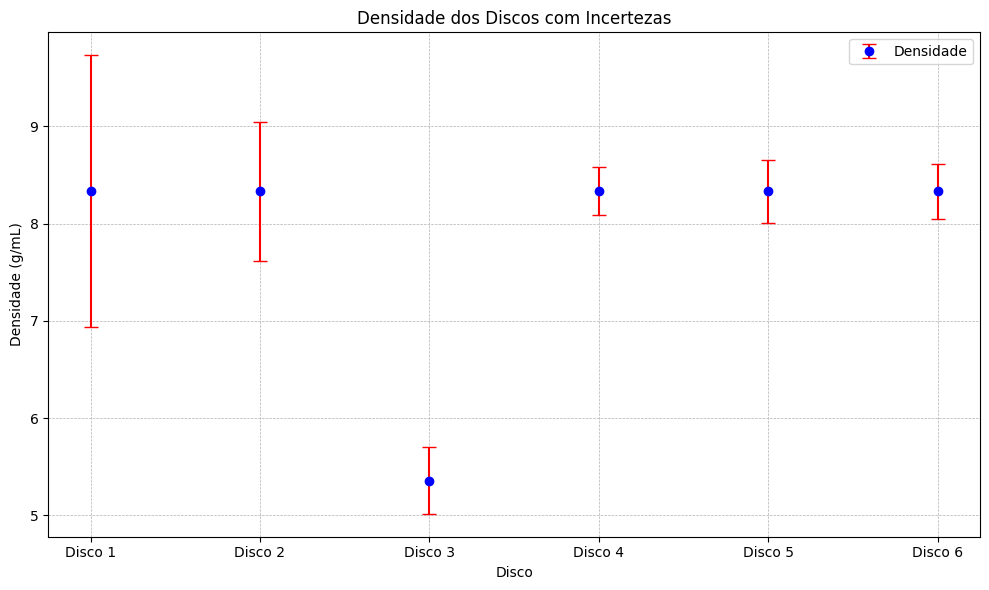

In [14]:
plt.figure(figsize=(10, 6))
plt.errorbar(df_densidades["Disco"], df_densidades["Densidade (g/mL)"], yerr=df_densidades["Incerteza (g/mL)"], 
             fmt='o', color='blue', ecolor='red', capsize=5, label='Densidade')
plt.title('Densidade dos Discos com Incertezas')
plt.xlabel('Disco')
plt.ylabel('Densidade (g/mL)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
 
plt.show()
